
# Risk Prediction - Ouray County Parcel Risk
**Author:** Bryce A Young  
**Created:** 2025-01-17 | 
**Modified:** 2025-02-21 

#### Overview
This notebook trains and tests various supervized machine learning models to predict home risk scores. For each model, we explore and tune the parameters to minimize loss, and we analyze the suitability of each model.

## Step 0: Setup Environment
---

In [21]:
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Folder with other geometries
geoms = os.path.join(data, 'county_geoms')
# Folder with feature set
feat_path = os.path.join(data, '_out')
# Folder with risk scores
scores = os.path.join(data, 'wrwc_rwra')
# Scratch folder for intermediate files
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# Ensure correct working directory
os.getcwd()

'D:\\_PROJECTS\\P001_OurayParcel\\ouray'

## Step 1: Examine Risk Score Data
---

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Set option to show all columns when displaying dataframes and geodataframes
pd.set_option('display.max_columns', None)

wrwc_df = pd.read_csv(os.path.join(scores, 'WRWC_RWRA.csv'))
wrwc_gdf = gpd.read_file(os.path.join(scores, r'WRWC_RWRA_geopackage/WRWC_Data.gdb'))

In [4]:
wrwc_gdf.head()

,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,geometry
0,2013.0,21932 2225 RD,297931200016,A,0,0,NaN,0,NaN,75,50,0,0,30,0,NaN,10,165,Moderate,POINT Z (-107.94621 38.9729 0)
1,2013.0,21944 2225 RD,297931200018,A,0,0,NaN,0,NaN,75,50,0,60,30,50,NaN,10,275,Very High,POINT Z (-107.947 38.9732 0)
2,2013.0,21939 2225 RD,297931200061,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360,Extreme,POINT Z (-107.94698 38.97218 0)
3,2013.0,21961 2225 RD,297931200060,A,0,0,NaN,75,NaN,50,75,0,60,30,50,NaN,10,350,Extreme,POINT Z (-107.9474 38.97219 0)
4,2013.0,21973 2225 RD,297931200021,A,0,0,NaN,75,NaN,50,75,0,60,30,50,NaN,10,350,Extreme,POINT Z (-107.948 38.9723 0)


In [6]:
wrwc_df.head()

,OBJECTID,Join_Count,ID,Fire_Prote,county,Year,Address_Po,Ingress_Eg,Driveway_W,Driveway_C,Driveway_L,Distance_t,Slope_or_G,Background,Defesnible,Roof,Siding,Distance_1,Combustibl,Proximity_,Type_of_St,Score,Risk_Ratin,address,town,latitude,longitude,x,y,ParcelNum
0,1,0,DC001,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Greater than 24',,,Greater than 150',,Heavy,Between 30' - 150',Class A,Non-Combustible,Less than 10' from structure,NaN,,,1 Moderate,Moderate,21932 2225 RD,CEDAREDGE,38.9729,-107.946,-107.946,38.9729,NaN
1,2,1,DC002,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Greater than 24',,,Greater than 150',,Heavy,Between 30' - 150',Class A,"Wood, Vinyl",Less than 10' from structure,Combustible Deck/Fence attached to Structure,,,2 High,High,21944 2225 RD,CEDAREDGE,38.9732,-107.947,-107.947,38.9732,2.979312e+11
2,3,1,DC003,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Between 20' -24',,,Less than 50',,Moderate,Less than 10',Class A,"Wood, Vinyl",Between 10' - 30' from structure,Combustible Deck/Fence attached to Structure,,,4 Extreme,Extreme,21939 2225 RD,CEDAREDGE,38.9713,-107.947,-107.947,38.9713,2.979312e+11
3,4,1,DC004,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Greater than 24',,,Less than 50',,Moderate,Between 10' - 30',Class A,"Wood, Vinyl",Less than 10' from structure,Combustible Deck/Fence attached to Structure,,,3 Very High,Very High,21961 2225 RD,CEDAREDGE,38.9721,-107.947,-107.947,38.9721,2.979312e+11
4,5,1,DC005,Cedaredge,Delta,2013,Posted and Reflective,One Road In/Out,Greater than 24',,,Less than 50',,Moderate,Between 10' - 30',Class A,"Wood, Vinyl",Less than 10' from structure,Combustible Deck/Fence attached to Structure,,,3 Very High,Very High,21973 2225 RD,CEDAREDGE,38.9723,-107.948,-107.948,38.9723,2.979312e+11


In [31]:
print(wrwc_df['ID'].nunique())
print(len(wrwc_df))

4591
6596


In [5]:
feat = pd.read_csv(os.path.join(feat_path, 'feat_nonan.csv'))
feat.head()

,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,Actual Year Built\n(AYB),Air Conditioning\n(AIRC),Architecture Style\n(ARCH),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),Condition\n(COND),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Exterior Wall\n(EXW),Floor\n(FLR),Frame\n(FRME),Heating Fuel\n(HTFL),Interior Wall\n(INT),Neighborhood\n(NBHD),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),RMS\n(RMS),Roof Cover\n(RCVR),Roof Structure\n(RSTR),Type,WBL - Wood Balcony\n(SubArea_WBL)
0,Ouray County,5,11.936200,0.079294,0.119998,0.066202,0.003467,2,403726200085,R002417,35.8913,False,1999.0,0 - N/A,1 - RANCH,0.0,2006.0,3 - GOOD,0.0,2005.0,100.0,9 - MASONITE,1 - WDJST PLYW,9 - FRME 2X4,7 - PROPANE,1 - DRYWALL,7000006 - Outlying6,0.0,577.5,0.776148,9 - PRO PANEL,3 - SHED MED,Residence,0.0
1,Ouray County,1,213.672097,0.032280,0.038839,0.006272,0.000000,0,403915300016,R004080,40.1202,False,2009.0,0 - N/A,1 - RANCH,0.0,1725.0,2 - VERY GOOD,0.0,2010.0,90.0,5 - STUCCO (F),4 - CONC/TILE,9 - FRME 2X4,3 - GAS,1 - DRYWALL,7000006 - Outlying6,560.0,0.0,0.776148,3 - DISTRESSED METAL,6 - GABEL MED,Residence,0.0
2,Ouray County,5,183.675975,0.063696,0.097281,0.033223,0.082861,0,403736200037,R002506,39.7779,False,1996.0,0 - N/A,7 - MTN CABIN,0.0,692.6,3 - GOOD,0.0,2005.0,100.0,2 - WOOD,5 - CONCRETE,0 - N/A,2 - WOOD,1 - DRYWALL,7000006 - Outlying6,0.0,0.0,0.000000,5 - ASPH SHNGL,3 - SHED MED,Residence,0.0
3,Ouray County,5,101.386718,0.037428,0.219677,0.253634,0.000842,0,403925218002,R004877,16.5952,True,2004.0,0 - N/A,5 - MODULAR,0.0,894.0,3 - GOOD,0.0,2010.0,100.0,9 - MASONITE,1 - WDJST PLYW,9 - FRME 2X4,7 - PROPANE,1 - DRYWALL,7000006 - Outlying6,179.0,0.0,0.776148,9 - PRO PANEL,6 - GABEL MED,Residence,0.0
4,Ouray County,3,20.213243,0.056646,0.058065,0.112239,0.181261,2,404129300015,R004133,398.9760,False,1958.0,1 - NONE,1 - RANCH,0.0,1262.0,3 - GOOD,0.0,1995.0,100.0,9 - MASONITE,1 - WDJST PLYW,9 - FRME 2X4,7 - PROPANE,3 - PANELING,7000002 - Outlying2,0.0,0.0,0.000000,9 - PRO PANEL,6 - GABEL MED,Residence,0.0


In [ ]:
# How many assessments in Ouray?
wrwc_df_ouray = wrwc_df[wrwc_df['county'] == 'Ouray']
len(wrwc_df_ouray)

1081

In [29]:
wrwc_df_ouray.head(2)

,OBJECTID,Join_Count,ID,Fire_Prote,county,Year,Address_Po,Ingress_Eg,Driveway_W,Driveway_C,Driveway_L,Distance_t,Slope_or_G,Background,Defesnible,Roof,Siding,Distance_1,Combustibl,Proximity_,Type_of_St,Score,Risk_Ratin,address,town,latitude,longitude,x,y,ParcelNum
4122,4123,1,LH1000,LogHill,Ouray,2017,"Posted, NOT Reflective",Two or More Roads In/Out,Greater than 24',,,Greater than 150',Less than 20%,Light,Between 30' - 150',Class A,Non-Combustible,"None, Greater than 30' from structure",Non-Combustible Deck/Fence attached to Structure,,,0 Low,Low,416 COUNTY ROAD 22A,Log Hill Mesa Fire Protection District,38.289468,-107.823723,-107.823723,38.289468,403935100181
4123,4124,1,LH1001,LogHill,Ouray,2017,Not Visible from the Road,Two or More Roads In/Out,Greater than 24',,,Greater than 150',Less than 20%,Light,Greater than 150',Class A,Non-Combustible,Less than 10' from structure,Non-Combustible Deck/Fence attached to Structure,,,0 Low,Low,3100 COUNTY ROAD 22,Log Hill Mesa Fire Protection District,38.297780,-107.824325,-107.824325,38.297780,403926423002


In [9]:
wrwc_df_ouray['ParcelNum'].nunique()

1002

In [21]:
feat['PARCELNB'].nunique()

2479

In [23]:
len(feat)

4002

In [10]:
wrwc_df_ouray['ParcelNum'].isna().sum()

np.int64(2)

In [17]:
# What are the data types of parcel numbers across the three datasets

print(f'wrwc df dtype: {wrwc_df_ouray['ParcelNum'].dtype}')
print(f'wrwc GDF dtype: {wrwc_gdf['ParcelNum'].dtype}')
print(f'feat dtype: {feat['PARCELNB'].dtype}')

wrwc df dtype: float64
wrwc GDF dtype: object
feat dtype: object


So first thing we need to do is convert 'ParcelNum' to string in the wrwc csv.

In [19]:
wrwc_df_ouray = wrwc_df_ouray.dropna(subset=['ParcelNum'])
wrwc_df_ouray['ParcelNum'] = wrwc_df_ouray['ParcelNum'].astype(int).astype(str)
wrwc_df_ouray['ParcelNum'].isin(feat['PARCELNB']).sum()

np.int64(935)

In [20]:
feat['PARCELNB'].isin(wrwc_df_ouray['ParcelNum']).sum()

np.int64(1362)

In [25]:
wrwc_df = wrwc_df.dropna(subset=['ParcelNum'])
wrwc_df['ParcelNum'] = wrwc_df['ParcelNum'].astype(int).astype(str)
feat['PARCELNB'].isin(wrwc_df['ParcelNum']).sum()

np.int64(1514)

In [26]:
feat['PARCELNB'].isin(wrwc_gdf['ParcelNum']).sum()

np.int64(1511)

In [28]:
print(f'total row matches: {wrwc_df['ParcelNum'].isin(feat['PARCELNB']).sum()}')
print(f'unique parcelnum matches: {wrwc_df.loc[wrwc_df['ParcelNum'].isin(feat['PARCELNB']), 'ParcelNum'].nunique()}')

total row matches: 1027
unique parcelnum matches: 933


So of the 4000 building centroids that I have features for, there are 1514 rows with 'PARCELNB' values that are also in the WRWC csv.

The wrwc df and the feat df both contain duplicate values for parcel numbers. So this results in a many-to-many relationship between the data. If I join the csvs, then I am losing confidence that the risk score is assigned to the correct building from my centroids dataset. 

So I will try to see if I can relate the centroids to the geometries in the gdf.

<Axes: >

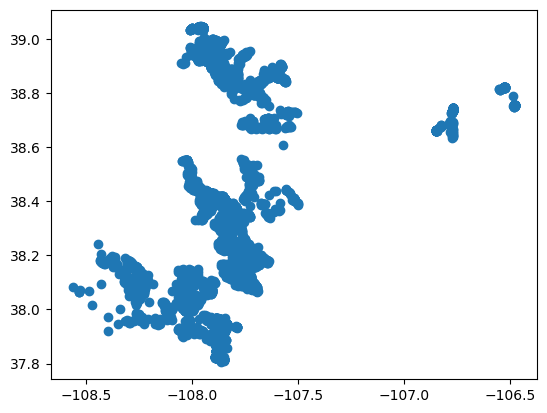

In [34]:
wrwc_gdf.to_crs(26913)
wrwc_gdf.plot()

<Axes: >

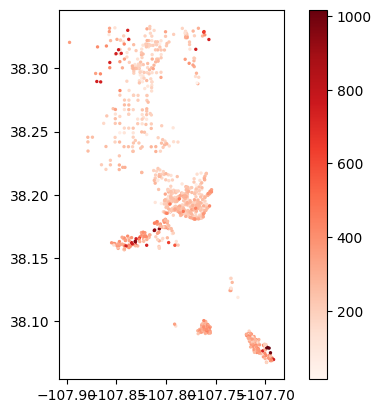

In [ ]:
# Plot risk scores of assessments that are in my feature set
wrwc_gdf_ouray = wrwc_gdf[wrwc_gdf['ParcelNum'].isin(feat['PARCELNB'])]
wrwc_gdf_ouray.plot(column='Score_Final', legend=True, cmap='Reds', markersize=2)

In [37]:
wrwc_gdf_ouray.head()

,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,geometry
976,2013.0,123 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,75,75,0,0,10,50,NaN,10,225,High,POINT Z (-107.79564 38.18671 0)
977,2013.0,129 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,50,50,0,20,10,0,NaN,0,135,Low,POINT Z (-107.79564 38.18671 0)
978,2013.0,135 EXAMPLE DRIVE,430506210001,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360,Extreme,POINT Z (-107.79564 38.18671 0)
979,2013.0,141 EXAMPLE DRIVE,430506210001,A,0,0,NaN,0,NaN,50,75,200,60,30,0,NaN,0,415,Extreme,POINT Z (-107.79564 38.18671 0)
4082,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,NaN,0,0.0,25,50,0,0,0,20,NaN,0,100,Low,POINT Z (-107.82372 38.28947 0)


In [38]:
len(wrwc_gdf_ouray)

1017

In [39]:
wrwc_gdf_ouray['ParcelNum'].nunique()

930

In [40]:
wrwc_gdf_ouray['address'].nunique()

586

In [50]:
wrwc_gdf_ouray['geometry'].nunique()

1004

## Step 2: Join Parcel Features and Risk Assessments
---

Okay, let's start over with a clean slate and new variables.

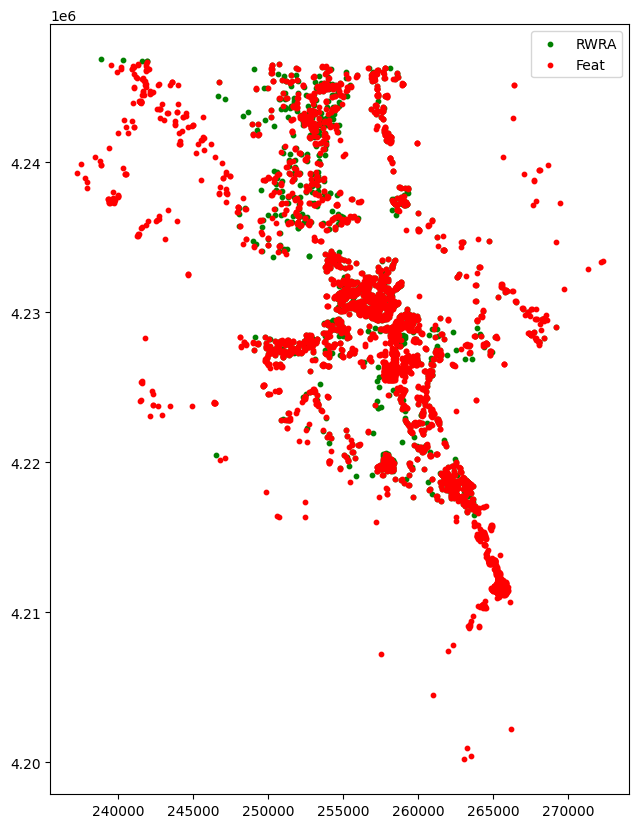

In [4]:
import os
### Directory ###
# Repository
os.chdir(r'D:/_PROJECTS/P001_OurayParcel/ouray')
# Root workspace
ws = r'D:/_PROJECTS/P001_OurayParcel'

### Data paths ###
# Folder where all the data inputs and outputs will live
data = os.path.join(ws, 'data')
# Folder with feature set
feat_path = os.path.join(data, '_out')
# Folder with risk scores
scores = os.path.join(data, 'wrwc_rwra')
# Scratch folder for intermediate files
scratch = os.path.join(data, '_temp')
# Any final outputs go here
out = os.path.join(data, '_out')
# Figures to export
figs = os.path.join(out, 'figures')

# Ensure correct working directory
os.getcwd()

# Import objects
import geopandas as gpd
import pandas as pd

pd.set_option('display.max_columns', None)
rwra = gpd.read_file(os.path.join(scores, r'WRWC_RWRA_geopackage/WRWC_Data.gdb'), layer='wrwc_ouray')
rwra = rwra.to_crs(26913)
feat = gpd.read_file(os.path.join(feat_path, 'centr_full_nonan_WKID26913.gpkg'))

# Plot to preview data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

# Plot rwra points in green
rwra.plot(ax=ax, color='green', markersize=10, label='RWRA')

# Plot feat points in red
feat.plot(ax=ax, color='red', markersize=10, label='Feat')

# Optional: add a legend and a title
plt.legend()
plt.show()

Since we projected `rwra` to EPSG:26913, we'll save it to file so we don't forget about it later.

In [35]:
rwra.to_file(os.path.join(scores, r'WRWC_RWRA_geopackage/WRWC_Data.gdb'), layer='wrwc_ouray', driver='GPKG')

In [5]:
print(len(rwra))
print(len(feat))

1684
4002


In [20]:
rwra['ParcelNum'].isna().sum()

np.int64(509)

Okay, this is an issue. There are 509 objects without ParcelNum values. I will have to bring in the parcels shapefile and fill in values where the point lands in the parcel.

In [22]:
parcels = gpd.read_file(os.path.join(geoms, 'parcels_WKID26913.gpkg'))

In [24]:
parcels.columns

Index(['ACCOUNT', 'PARCELNB', 'LAND_STATU', 'EditStatus', 'EDIT_STATU',
       'MS_Number', 'MS_Name', 'ACRES_calc', 'ACCT_URL', 'Note', 'NAMEADDRID',
       'NAMETYPE', 'NAME', 'ADDRESS1', 'ADDRESS2', 'CITY', 'STATE', 'ZIPCODE',
       'ACCTTYPE', 'STREETNO', 'EXTENT', 'DIRECTION', 'STREETNAME',
       'DESIGNATIO', 'DIRECTIONS', 'SUFFIX', 'UNITNUMBER', 'LOCCITY',
       'ZIPCODE1', 'SUBNAME', 'CONDONAME', 'SALEP', 'SALEDT', 'ACRES',
       'geometry'],
      dtype='object')

In [27]:
# Separate points without a ParcelNum
rwra_nan = rwra[rwra['ParcelNum'].isna()].copy()
# Reset index for clean joining
rwra_nan_reset = rwra_nan.reset_index()

# Spatial join (points within parcels)
joined = gpd.sjoin(
    rwra_nan_reset,
    parcels[['PARCELNB', 'geometry']],
    how='left',
    predicate='within'
)

# Drop duplicates to keep only one parcel per point
joined_unique = joined.drop_duplicates(subset='index', keep='first')

# Assign the PARCELNB back to original rwra_nan
rwra_nan['ParcelNum'] = joined_unique.set_index('index')['PARCELNB']

# Update original rwra
rwra.loc[rwra_nan.index, 'ParcelNum'] = rwra_nan['ParcelNum']


In [29]:
rwra['ParcelNum'].isna().sum()

np.int64(0)

Here is the solution to matching features and risk assessments. Unforntunately this is difficult with the csv files alone. Fortunately, we have points for the assessments. Looking at them in ArcGIS Pro, we can see that they land approximately ontop of the building centroid. So we're going to write a function and a short script that does the following:

1. If only one point exists per parcel in each dataset:
    - Simply match rows by parcel number.
2. If multiple points exist per parcel in either or both datasets:
    - Match rows where the parcel number is the same AND the points from each dataset are spatially closest to each other. (i.e., pick pairs based on minimum distance between points).

In [30]:
import geopandas as gpd
import pandas as pd

def match_structures(rwra, feat):
    matches = []

    # Go through each unique parcel number from rwra
    for parcel in rwra['ParcelNum'].unique():
        rwra_subset = rwra[rwra['ParcelNum'] == parcel]
        feat_subset = feat[feat['PARCELNB'] == parcel]

        if len(rwra_subset) == 0 or len(feat_subset) == 0:
            # Skip parcels without points in either dataset
            continue

        elif len(rwra_subset) == 1 and len(feat_subset) == 1:
            # Direct one-to-one match
            match = {
                'rwra_index': rwra_subset.index[0],
                'feat_index': feat_subset.index[0],
                'parcel_num': parcel
            }
            matches.append(match)

        else:
            # Multiple points: match each rwra point to nearest feat point
            rwra_subset = rwra_subset.copy()
            feat_subset = feat_subset.copy()

            # For each rwra point, find closest feat point
            for rwra_idx, rwra_row in rwra_subset.iterrows():
                feat_subset['distance'] = feat_subset.geometry.distance(rwra_row.geometry)
                closest_feat_idx = feat_subset['distance'].idxmin()

                match = {
                    'rwra_index': rwra_idx,
                    'feat_index': closest_feat_idx,
                    'parcel_num': parcel
                }
                matches.append(match)

                # Drop matched feat point to avoid duplicates
                feat_subset = feat_subset.drop(index=closest_feat_idx)

                if feat_subset.empty:
                    break  # No feat points left to match

    # Convert matches into DataFrame
    matches_df = pd.DataFrame(matches)

    # Merge matched attributes from rwra and feat
    merged_df = matches_df \
        .merge(rwra.drop(columns='geometry'), left_on='rwra_index', right_index=True, suffixes=('', '_rwra')) \
        .merge(feat, left_on='feat_index', right_index=True, suffixes=('_rwra', '_feat'))

    # Turn merged DataFrame back into a GeoDataFrame using feat's geometry
    matched_gdf = gpd.GeoDataFrame(merged_df, geometry='geometry', crs=feat.crs)

    return matched_gdf


In [31]:
gdf = match_structures(rwra, feat)
print(len(gdf))
gdf.head()

1400


,rwra_index,feat_index,parcel_num,Year,address,ParcelNum,Model,Address_Visible,Driveway_Clearance,Driveway_Lenth,Dist_to_Danger_Topo,Slope_Final,Background_Fuels,Defensible_Space,Roofing_Material,Building_Exterior,Other_Combustibles,Decks_and_Fencing,Proximity_to_Neighboring_Home,Ingress_Egress,Score_Final,Risk_Rating,County,wui_class,min_ssd,mean_cc0_2m,mean_cc2_4m,mean_cc4_8m,mean_cc8_40m,intersections,PARCELNB,ACCOUNT,ACRES_calc,hiz_ext_out,Actual Year Built\n(AYB),Air Conditioning\n(AIRC),Architecture Style\n(ARCH),Area Acres\n(Area_ACRES),Area SQFT\n(Area_SQFT),Condition\n(COND),DGR - Detached Garage\n(SubArea_DGR),Effective Year Built\n(EYB),Exterior Percent\n(EXW_PERCENT),Exterior Wall\n(EXW),Floor\n(FLR),Frame\n(FRME),Heating Fuel\n(HTFL),Interior Wall\n(INT),Neighborhood\n(NBHD),OPP - Open Porch\n(SubArea_OPP),PTO - Patio\n(SubArea_PTO),RMS\n(RMS),Roof Cover\n(RCVR),Roof Structure\n(RSTR),Type,WBL - Wood Balcony\n(SubArea_WBL),geometry
0,0,2836,430506210001,2013.0,123 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,75,75,0,0,10,50,NaN,10,225,High,Ouray County,1,31.525324,0.028983,0.080487,0.112609,0.179108,1,430506210001,R003918,49.6527,True,2008.0,0 - N/A,5 - COMM S,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,1 - METAL,3 - GABLE,Commercial,0.0,POINT (255148.616 4230223.23)
1,1,1110,430506210001,2013.0,129 EXAMPLE DRIVE,430506210001,A,0,5,NaN,0,NaN,50,50,0,20,10,0,NaN,0,135,Low,Ouray County,1,31.525324,0.051442,0.096132,0.093393,0.155315,1,430506210001,R003918,49.6527,False,2008.0,0 - N/A,5 - COMM S,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,1 - METAL,3 - GABLE,Commercial,0.0,POINT (255108.006 4230179.848)
2,2,3672,430506210001,2013.0,135 EXAMPLE DRIVE,430506210001,A,0,5,NaN,75,NaN,50,100,0,60,10,50,NaN,10,360,Extreme,Ouray County,1,66.164004,0.035089,0.059277,0.031211,0.026098,0,430506210001,R003918,49.6527,True,2008.0,0 - N/A,5 - COMM S,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,1 - METAL,3 - GABLE,Commercial,0.0,POINT (255042.316 4230227.366)
3,3,3843,430506210001,2013.0,141 EXAMPLE DRIVE,430506210001,A,0,0,NaN,0,NaN,50,75,200,60,30,0,NaN,0,415,Extreme,Ouray County,1,78.033957,0.054498,0.065344,0.076959,0.213781,0,430506210001,R003918,49.6527,False,2008.0,0 - N/A,5 - COMM S,0.0,6991.1,3 - GOOD,0.0,2015.0,10.0,15 - STONE,11 - CONCRETE,9 - FRME 2X4,7 - PROPANE,5 - GOOD,5000591 - LHV TR 35+,327.4,0.0,0.776148,1 - METAL,3 - GABLE,Commercial,0.0,POINT (255079.817 4230091.78)
4,5,921,403935100181,2017.0,416 COUNTY ROAD 22A,403935100181,B,5,0,NaN,0,0.0,25,50,0,0,0,20,NaN,0,100,Low,Ouray County,1,211.505051,0.048738,0.084885,0.034318,0.000000,0,403935100181,R000531,32.7283,False,2012.0,0 - N/A,1 - RANCH,0.0,4034.9,3 - GOOD,0.0,2015.0,100.0,26 - CONCRETE SIDING,1 - WDJST PLYW,9 - FRME 2X4,3 - GAS,1 - DRYWALL,7000006 - Outlying6,572.0,215.0,0.776148,5 - ASPH SHNGL,6 - GABEL MED,Residence,0.0,POINT (252995.437 4241729.295)


Okay, so there are 1400 matching parcels for which I have both risk assessment data and remotely sensed parcel features. Let's plot the matched points with lines connecting them in order to see how this match took place.

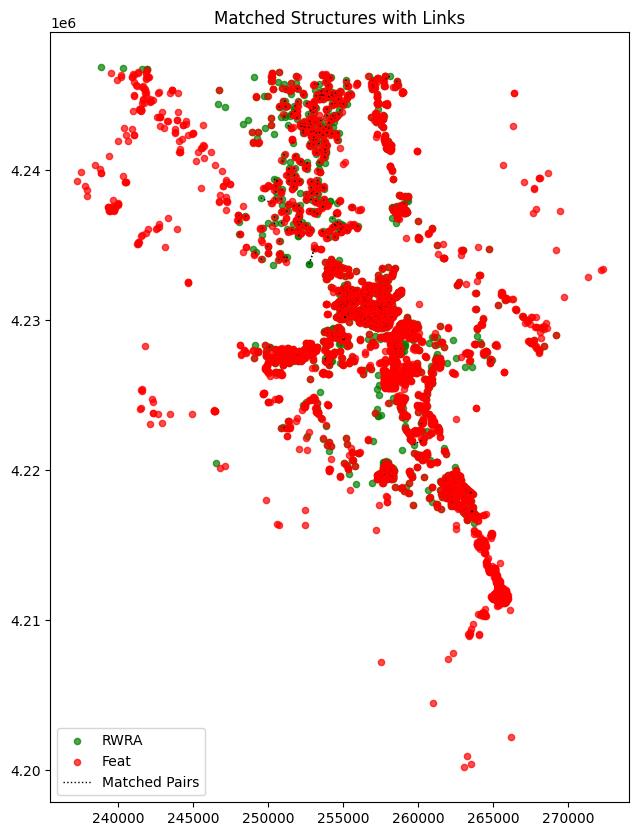

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

def plot_matched_links(matched_gdf, rwra, feat):
    line_geoms = []

    for _, row in matched_gdf.iterrows():
        rwra_geom = rwra.loc[row['rwra_index'], 'geometry']
        feat_geom = feat.loc[row['feat_index'], 'geometry']

        # Ensure both are points
        if rwra_geom.geom_type == 'Point' and feat_geom.geom_type == 'Point':
            # Extract coordinates explicitly
            line = LineString([(rwra_geom.x, rwra_geom.y), (feat_geom.x, feat_geom.y)])
            line_geoms.append(line)
        else:
            print(f"Non-point geometry at rwra_index: {row['rwra_index']} or feat_index: {row['feat_index']}")

    lines_gdf = gpd.GeoDataFrame(geometry=line_geoms, crs=rwra.crs)

    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    rwra.plot(ax=ax, color='green', markersize=20, label='RWRA', alpha=0.7)
    feat.plot(ax=ax, color='red', markersize=20, label='Feat', alpha=0.7)
    lines_gdf.plot(ax=ax, color='black', linestyle=':', linewidth=1, label='Matched Pairs')

    plt.legend()
    plt.title('Matched Structures with Links')
    plt.show()

    return lines_gdf

# Run the updated version:
lines_gdf = plot_matched_links(gdf, rwra, feat)



In [33]:
lines_gdf.to_file(os.path.join(scratch, 'matches.gpkg'), driver='GPKG', index=False)

In [34]:
gdf.to_file(os.path.join(out, 'feat_risk_final.gpkg'), driver='GPKG', index=False)

In [18]:
gdf.columns

Index(['rwra_index', 'feat_index', 'parcel_num', 'Year', 'address',
       'ParcelNum', 'Model', 'Address_Visible', 'Driveway_Clearance',
       'Driveway_Lenth', 'Dist_to_Danger_Topo', 'Slope_Final',
       'Background_Fuels', 'Defensible_Space', 'Roofing_Material',
       'Building_Exterior', 'Other_Combustibles', 'Decks_and_Fencing',
       'Proximity_to_Neighboring_Home', 'Ingress_Egress', 'Score_Final',
       'Risk_Rating', 'County', 'wui_class', 'min_ssd', 'mean_cc0_2m',
       'mean_cc2_4m', 'mean_cc4_8m', 'mean_cc8_40m', 'intersections',
       'PARCELNB', 'ACCOUNT', 'ACRES_calc', 'hiz_ext_out',
       'Actual Year Built\n(AYB)', 'Air Conditioning\n(AIRC)',
       'Architecture Style\n(ARCH)', 'Area Acres\n(Area_ACRES)',
       'Area SQFT\n(Area_SQFT)', 'Condition\n(COND)',
       'DGR - Detached Garage\n(SubArea_DGR)', 'Effective Year Built\n(EYB)',
       'Exterior Percent\n(EXW_PERCENT)', 'Exterior Wall\n(EXW)',
       'Floor\n(FLR)', 'Frame\n(FRME)', 'Heating Fuel\n(HTFL)'

In [36]:
# Save as csv for lighter analysis
df = gdf.drop(columns=['geometry', 'ParcelNum', 'rwra_index', 'feat_index', 'parcel_num', 'PARCELNB', 
                       'address', 'Model', 'County', 'ACCOUNT', 'Area Acres\n(Area_ACRES)'])
df.to_csv(os.path.join(out, 'final_df.csv'), index=False)

Okay, because this is a whrilwind of a day here is the synopsis of what I did:

Outputs: final_df.csv (located in output folder)
lines connecting matched points: matches.gpkg, located in scratch folder
feat_risk_final.gpkg - located in output folder (contains features and risk assessment data)

Look at the code block below. You can see that there are three different types of models that were used to create final risk scores in all of these assessments. I am going to have to figure out a way to normalize these or relate them somehow, so I'm not dealing with so much incongruency and inconsistency.

In [37]:
rwra['Model'].nunique()

3

#### Random Forest classifier
We will split the data into training, validation, and testing. We will create a random forest classifier and train it then test on val data while tuning the model params. 

In [ ]:
# Predicitons with Random Forest
# CREATE A TRAIN-TEST SPLIT AND FIT A RF CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select predictors and target variable
predictors = df[['predictor_column1', 'predictor_column2', 'predictor_column3']]
target = df['RISK.SCORE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Create a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

## Validation

Let's create a confusion matrix of prediction labels and true labels and plot it in a heat map to visualize how close we came.

We will get precision, recall and f1 score for each class.

Let's produce an ROC curve for each class in the model

## Ordinal analysis
Let's convert the target variable to ordinal. Then we can create a confusion matrix and extract the cumulative metrics. Then we extract the cumulative precision across ordinal classes.

## Classification by Logistic Regression

Here we import the data and plot to see whether logistic regression is appropriate for the analysis. We do this with continuous variables.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit as strat
import matplotlib.pyplot as plt

# Read the data into the script
df = pd.read_csv('A3_Q1_data.csv')

# Convert df to numpy array
data = df.values

# Extract features and labels
X = data[:, :-1]  # Features x_1 and x_2
y = data[:, -1]   # Labels y

# Create stratified split
split = strat(n_splits=1, test_size=0.3, random_state=42)

# Perform the split
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# See the split outcome for confirmation
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Plot the training data by class
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='orchid', label='Class 0')
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='steelblue', label='Class 1')

plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')
plt.title('Training Data by Class')
plt.legend()
plt.show()

In [ ]:
# Calculations for x_1
x1_mean = np.mean(X_train[:, 0])
x1_std = np.std(X_train[:, 0])
x1_range = np.ptp(X_train[:, 0])

# Calculations for x_2
x2_mean = np.mean(X_train[:, 1])
x2_std = np.std(X_train[:, 1])
x2_range = np.ptp(X_train[:, 1])

# Print the results
print("Feature x_1:")
print(f"Mean: {x1_mean: .4f}, Standard Deviation: {x1_std: .4f}, Range: {x1_range: .4f}")
print("\nFeature x_2:")
print(f"Mean: {x2_mean: .4f}, Standard Deviation: {x2_std: .4f}, Range: {x2_range: .4f}")

If logistic regression is appropriate for this analysis, refer to  assignment 3 for fitting, gradient descent, AUC and precision-recall.